In [142]:
#inbuilt interrupt in langgraph

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import BaseMessage
from langchain_groq import ChatGroq
from langchain_core.messages import AIMessage,ToolMessage
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
from langgraph.prebuilt import tools_condition,ToolNode
from typing import Annotated
from typing import TypedDict,Sequence

In [143]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [144]:
os.environ['GROQ_API_KEY']=os.getenv("GROQ_API_KEY")
os.environ['TAVILY_API_KEY']=os.getenv("TAVILY_API_KEY")

In [145]:
llm=ChatGroq(model="gemma2-9b-it")

In [146]:
llm.invoke("what is gen i").content

"Gen I refers to the first generation of **Pokémon**. \n\nThis generation includes the original 151 Pokémon introduced in the games **Pokémon Red, Green, Blue, and Yellow** for the Game Boy. It also encompasses the anime series' first season, the first generation of trading cards, and the original Pokémon manga. \n\nHere are some key features of Gen I:\n\n* **151 Pokémon:**  From Bulbasaur to Mewtwo, these iconic creatures defined the world of Pokémon for many.\n* **Kanto Region:** The games take place in this fictional region, featuring diverse locations like Pallet Town, Viridian Forest, and Mt. Moon.\n* **8 Gyms:** Trainers must defeat these gym leaders to earn badges and eventually challenge the Elite Four and Champion.\n* **Original Gameplay Mechanics:** Features like type matchups, experience points, and evolution were established in Gen I and remain fundamental to the Pokémon franchise.\n\n\nLet me know if you'd like to know more about specific aspects of Gen I, like the Pokémon

In [147]:
search=TavilySearchResults()

In [148]:
search.invoke("what is gen ai")

[{'url': 'https://en.m.wikipedia.org/wiki/Generative_artificial_intelligence',
  'content': 'Generative artificial intelligence (generative AI, GenAI, [1] or GAI) is a subset of artificial intelligence that uses generative models to produce text, images, videos, or other forms of data. [2] [3] [4] These models learn the underlying patterns and structures of their training data and use them to produce new data [5] [6] based on the input, which often comes in the form of natural'},
 {'url': 'https://www.geeksforgeeks.org/what-is-generative-ai/',
  'content': 'Generative AI is a subset of deep learning that creates new artificial content or data without human intervention. Learn about the working, types, and applications of generative models such as GANs, VAEs, transformers, and more.'},
 {'url': 'https://www.coursera.org/articles/what-is-generative-ai',
  'content': 'Writing or improving content by producing a draft text in a specific style or length\nAdding subtitles or dubbing educatio

In [149]:
tools=[search]

In [150]:
model_with_tools=llm.bind_tools(tools=tools)

In [151]:
model_with_tools.invoke("what is gena i")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_j4be', 'function': {'arguments': '{"query":"gena i"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 985, 'total_tokens': 1072, 'completion_time': 0.158181818, 'prompt_time': 0.053298326, 'queue_time': 0.020878303999999993, 'total_time': 0.211480144}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-673bb498-f2ec-42ea-aa09-61a6e99911c9-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'gena i'}, 'id': 'call_j4be', 'type': 'tool_call'}], usage_metadata={'input_tokens': 985, 'output_tokens': 87, 'total_tokens': 1072})

In [152]:
class AgentState(TypedDict):
    messages:Annotated[list,add_messages]

In [153]:
def call_llm(state:AgentState):
    return {"messages":[model_with_tools.invoke(state['messages'])]}

In [154]:
graph=StateGraph(AgentState)

In [155]:
graph.add_node("ai_assisstance",call_llm)
tool_node=ToolNode(tools=tools)
graph.add_node("tools",tool_node)


In [156]:
graph.add_conditional_edges("ai_assisstance",tools_condition)
graph.add_edge(START,"ai_assisstance")
graph.add_edge("tools","ai_assisstance")

In [157]:
memory=MemorySaver()

In [158]:
app=graph.compile(checkpointer=memory,interrupt_before=['tools'])

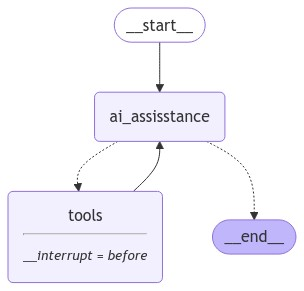

In [159]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except:
    pass

In [160]:
input="which state is called electronic capital in india"
config={"configurable":{"thread_id":"1"}}
events=app.stream({"messages":[("user",input)]},config=config,stream_mode="values")

In [161]:
for event in events:
    if "messages" in event:
        event['messages'][-1].pretty_print()

================================ Human Message =================================

which state is called electronic capital in india
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_d55j)
 Call ID: call_d55j
  Args:
    query: which state is called electronic capital in india


In [162]:
snapshot=app.get_state(config)

In [163]:
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='which state is called electronic capital in india', additional_kwargs={}, response_metadata={}, id='8d27143f-e950-42a8-a185-f575644961d7'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_d55j', 'function': {'arguments': '{"query":"which state is called electronic capital in india"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 989, 'total_tokens': 1082, 'completion_time': 0.169090909, 'prompt_time': 0.031280204, 'queue_time': 0.022447790000000002, 'total_time': 0.200371113}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9eee2245-1be3-43f7-83f3-c79693ad25f1-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'which state is called electronic capital in india'}, 'id': 'call_d55j', 'type': 'tool_call'}], usage_metadat

In [164]:
snapshot.next

('tools',)

In [165]:
last_message=snapshot.values['messages'][-1]

In [166]:
last_message

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_d55j', 'function': {'arguments': '{"query":"which state is called electronic capital in india"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 989, 'total_tokens': 1082, 'completion_time': 0.169090909, 'prompt_time': 0.031280204, 'queue_time': 0.022447790000000002, 'total_time': 0.200371113}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9eee2245-1be3-43f7-83f3-c79693ad25f1-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'which state is called electronic capital in india'}, 'id': 'call_d55j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 989, 'output_tokens': 93, 'total_tokens': 1082})

In [167]:
last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'which state is called electronic capital in india'},
  'id': 'call_d55j',
  'type': 'tool_call'}]

In [168]:
events=app.stream(None,config,stream_mode='values')

In [169]:
for event in events:
    if "messages" in event:
        event['messages'][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_d55j)
 Call ID: call_d55j
  Args:
    query: which state is called electronic capital in india
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://testbook.com/question-answer/which-one-of-the-following-cities-is-known-as-lsq--6260f07312b2f8b0645a389d", "content": "The correct answer is Bangalore.. Key Points. Bangalore is called the electronic capital of India.; It is also known as the Silicon Valley of India; The capital of the state of Karnataka in India.; It is one of the largest electronic/IT industrial parks in India, spread over 800 acres.; Additional Information"}, {"url": "https://brainly.in/question/59492902", "content": "Bengaluru is the capital of the state of Karnataka in southern India. It is one of the largest and most populous cities in India, with a population of 

In [170]:
input1="what is the weather in begaluru"
events=app.stream({"messages":["user",input1]},config=config,stream_mode='values')

In [171]:
for event in events:
    if "messages" in event:
        event['messages'][-1].pretty_print()

================================ Human Message =================================

what is the weather in begaluru
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_cds3)
 Call ID: call_cds3
  Args:
    query: weather in bangalore


In [172]:
snapshot=app.get_state(config)

In [174]:
current_state=snapshot.values['messages'][-1]

In [181]:
current_state

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cds3', 'function': {'arguments': '{"query":"weather in bangalore"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 1634, 'total_tokens': 1686, 'completion_time': 0.094545455, 'prompt_time': 0.064057833, 'queue_time': 0.022292736000000007, 'total_time': 0.158603288}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-785a5fe9-ad90-4186-9e36-b3ea51d7de3d-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'weather in bangalore'}, 'id': 'call_cds3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1634, 'output_tokens': 52, 'total_tokens': 1686})

In [177]:
current_state.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_cds3)
 Call ID: call_cds3
  Args:
    query: weather in bangalore


In [193]:
id=current_state.tool_calls[0]['id']

In [194]:
id

'call_cds3'

In [182]:
answer="weather in the begaluru is 28 celsius"

In [185]:
new_message=[
    ToolMessage(content=answer,tool_call_id=id),
    AIMessage(content=answer)
]

In [187]:
app.update_state(config,{"messages":new_message})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efc95bc-9e1b-6214-8007-62e999cf908b'}}

In [191]:
print(app.get_state(config).values["messages"][-1:])

[AIMessage(content='weather in the begaluru is 28 celsius', additional_kwargs={}, response_metadata={}, id='333cfb91-dffc-4419-b406-55ad86565799')]
